<a href="https://colab.research.google.com/github/shimaaahmedd/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import scipy
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import cv2
from pylab import *
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
BASE= "/content/drive/MyDrive/Face recognition/Datasets/"
def KNN(X_train,X_test,y_train,y_test,kNeigbor,classify):
  classifier = KNeighborsClassifier(n_neighbors=kNeigbor,weights='distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  if classify == True:
    print(len(shapeTraining))
    for i in range (0,len(shapeTraining)):
      plt.imshow(shapeTraining[i])
      plt.show()
      figure
      if y_test[i] == y_pred[i]:
        print("Success\n")
      else:
        print("Failure\n")
      if y_test[i] == 1:
       print("True label: Human face image\n")
      elif y_test[i] == -1:
       print("True label: Non Human face image\n")
      if y_pred[i] == 1:
       print("Predicted label: Human face image\n")
      elif y_pred[i] == -1:
       print("Predicted label: Non Human face image\n")
  acc=accuracy_score(y_test, y_pred)*100
  return acc
 
def Mean(matrix,stepStart,stepAdd,matrixSize): #mean(matrix,5,5,200) #Mean(matrix,50,0,50)
  matrixtemp=[]
  mean=[]
  start=0
  end=start+stepStart #changed
  while(end<=matrixSize):
    for j in range(start,end):
      matrixtemp.append(matrix[j])
    matrix_mean=np.mean(matrixtemp,axis=0)#mean of 1 class
    mean.append(matrix_mean)#array of class means
    matrixtemp=[] 
    start+=stepStart #changed
    end=start+stepAdd #changed
  return mean
 
def getIndex(value,alpha):
  sum=0
  for s in value:
    sum+=s
  index=0
  var=0
  while var<alpha:
    index+=1
    num=0
    for n in range (0,index):
      num+=value[n]
    var=num/sum
  return index
 
def PCA(training):
  
  mean=np.mean(training, axis=0)
  Z=training-mean
  ZT=np.transpose(Z)
  COV=np.cov(ZT)
  val,vect=np.linalg.eigh(COV)
  idx = val.argsort()[::-1]  
  val = val[idx]
  vect = vect[:,idx]
  return val,vect
 
def LDA(training,images,stepStart,stepAdd,trainSize): #LDA(training,images,5,5,200):
  meanTrain=[]
  sTemp=[]
  sTempTrans=[]
  b=[]
  sb=[]
  meanTrain=Mean(training,stepStart,stepAdd,trainSize) #changed  mean(matrix,5,5,200) Mean(matrix,stepStart,stepAdd,matrixSize)
  mean=np.mean(images, axis=0)
  sb=np.zeros((10304,10304))
  meanTrainSize=len(meanTrain)
  # print(meanTrainSize)
  for i in range(0,meanTrainSize): #changed
    sTemp=meanTrain[i]-mean
    sTempTrans=np.transpose(sTemp)
    b=np.outer(sTemp,sTempTrans)
    if i==0:
      sb=sb+stepStart*b
    else:
      sb=sb+stepAdd*b
  start=0
  end=start+stepStart
  sMatrix=np.zeros((10304,10304))
  matrixtemp=[]
  for i in range(0,meanTrainSize):
    for j in range(start,end):
      matrixtemp.append(training[j])
    z=matrixtemp-meanTrain[i]
    sMatrix+=np.dot(np.transpose(z),z)
    matrixtemp=[]
    start+=stepStart
    end=start+stepAdd
# print("scatter matrix:",sMatrix)
  inv=scipy.linalg.pinvh(sMatrix)
  A=np.dot(inv,sb)
  # print(A)
  # print(A.shape)
  alpha,w=np.linalg.eigh(A)
  idx = alpha.argsort()[::-1]  
  alpha = alpha[idx]
  w = w[:,idx]
  return alpha,w
 
def Split(images,y,SplitNum,matrixSize): 
  if (SplitNum==7):
    Training,Test, yTraining,yTest = train_test_split(images, y, test_size=0.30) 
  else:
    Test=[]
    Training=[]
    yTest=[]
    yTraining=[]
    for k in range (0, matrixSize):
       if (k%2==0):
        if len(shapes) > 0:
          shapeTraining.append(shapes[k])
        Training.append(images[k])
        yTraining.append(y[k])
       else:
        Test.append(images[k])
        yTest.append(y[k]) 
    # print(len(shapeTraining))
    Training = np.array(Training)
    yTraining = np.array(yTraining)
    Test=np.array(Test)
    yTest=np.array(yTest)
  return Test,Training,yTest,yTraining

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("2. Generate the Data Matrix and the Label vector\n")
images=[]
y=[]
shapes=[]
for j in range (1,41):
  for i in range (1,11):
    filepath=BASE + 's'+str(j)+'/'+str(i)+'.pgm';
    img = cv2.imread(filepath, 0) # '0' for reading grayscale images
    IMG_SHAPE = img.shape
    x=cv2.imread(filepath, 0).flatten()
    images.append(x)
    y.append(j);
y=np.array(y)
images = np.array(images)
print("3. Split the Dataset into Training and Test sets\n")
shapeTraining=[]
Test,Training,yTest,yTraining=Split(images,y,5,400)

2. Generate the Data Matrix and the Label vector

3. Split the Dataset into Training and Test sets



4. Classification using PCA using tuning

For alpha=  0.8 

K=1-->> Accuracy= 95.0
K=3-->> Accuracy= 93.0
K=5-->> Accuracy= 93.0
K=7-->> Accuracy= 91.0
For alpha=  0.85 

K=1-->> Accuracy= 95.0
K=3-->> Accuracy= 93.0
K=5-->> Accuracy= 91.5
K=7-->> Accuracy= 87.5
For alpha=  0.9 

K=1-->> Accuracy= 94.0
K=3-->> Accuracy= 93.0
K=5-->> Accuracy= 90.5
K=7-->> Accuracy= 87.5
For alpha=  0.95 

K=1-->> Accuracy= 94.0
K=3-->> Accuracy= 92.0
K=5-->> Accuracy= 89.5
K=7-->> Accuracy= 85.5
5. Classification Using LDA using tuning

K=1-->> Accuracy= 96.5
K=3-->> Accuracy= 93.5
K=5-->> Accuracy= 92.0
K=7-->> Accuracy= 91.5


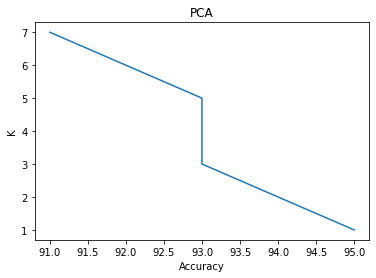

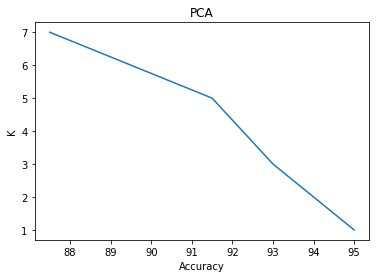

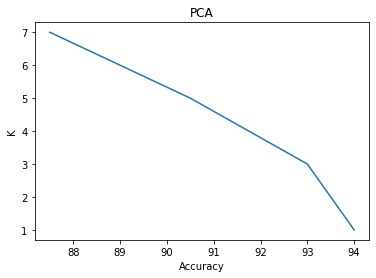

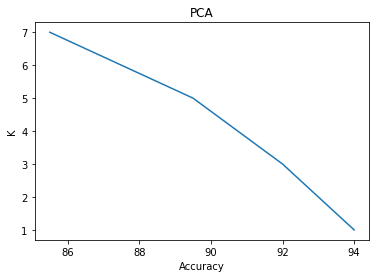

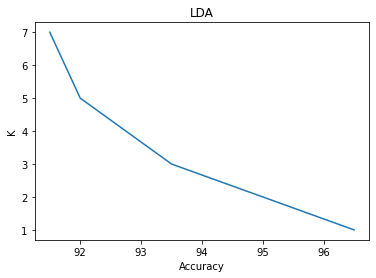

In [ ]:
print("4. Classification using PCA using tuning\n")

value,vector=PCA(Training)
alpha=[0.8,0.85,0.9,0.95]
index=[0,0,0,0]
for j in range (0,4):
  index[j]=getIndex(value,alpha[j])
  # print(index[j])
project=[]
tests=[]
trains=[]
for r in range (0,4):
  projection= vector[:,0:index[r]]
  project.append(projection)
  temp1=np.dot(Test,projection)
  temp2=np.dot(Training,projection)
  tests.append(temp1)
  trains.append(temp2)
  projection=[]
accuracy=[]
k=[1,3,5,7]
for i in range (0,4):
  print("For alpha= ",alpha[i],"\n")
  for j in range (1,8,2):
    acc=KNN(trains[i],tests[i],yTraining,yTest,j, False)
    print("K="+str(j)+"-->> Accuracy= "+str(acc))
    accuracy.append(acc)
  plt.figure()
  plt.plot(accuracy,k)
  plt.title("PCA")
  plt.xlabel('Accuracy')
  plt.ylabel('K')
  accuracy=[]

print("5. Classification Using LDA using tuning\n")
alpha,w=LDA(Training,images,5,5,200)    
projection= w[:,0:39]
newTest=np.dot(Test,projection)
newTrain=np.dot(Training,projection)
accuracy=[]
k=[1,3,5,7]
for i in range (1,8,2):
  acc=KNN(newTrain,newTest,yTraining,yTest,i,False)
  print("K="+str(i)+"-->> Accuracy= "+str(acc))
  accuracy.append(acc)
plt.figure()
plt.plot(accuracy,k)
plt.title("LDA")
plt.xlabel('Accuracy')
plt.ylabel('K')
shapeTraining=[]

In [ ]:
print("7. Compare vs Non-Face Images\n")
images=[]
label=[]
shapes=[]
for j in range (1,41):
  for i in range (1,11):
    filepath=BASE + 's'+str(j)+'/'+str(i)+'.pgm';
    img = cv2.imread(filepath, 0) # '0' for reading grayscale images
    IMG_SHAPE = img.shape
    shapes.append(img)
    x=img.flatten()
    images.append(x)
    label.append(1);
images = np.array(images)
nonimages=[]
for i in range (0,400):
  if(i<10):
    filepath=BASE + "dogs/"+"dog_000"+str(i)+".jpg";
  elif(i<100 and i>=10):
    filepath=BASE + "dogs/"+"dog_00"+str(i)+".jpg";
  else:
    filepath=BASE + "dogs/"+"dog_0"+str(i)+".jpg";
  img = cv2.imread(filepath)
  IMG_SHAPE = img.shape
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  x=cv2.resize(gray,(92, 112))
  shapes.append(x)
  nonimages.append(x.flatten())
  label.append(-1);
label=np.array(label)
nonimages = np.array(nonimages)
mixedImg=np.vstack((images,nonimages))
# print(mixedImg.shape,label.shape)
shapeTraining=[]
Test,Training,yTest,yTraining=Split(mixedImg,label,2,800)

7. Compare vs Non-Face Images



In [ ]:
#PCA
print("PCA cases")
alpha,w=PCA(Training)
index=getIndex(alpha,0.95)
mixedProjection= w[:,0:index]
newMixedTest=np.dot(Test,mixedProjection)
newMixedTrain=np.dot(Training,mixedProjection)
acc=KNN(newMixedTrain,newMixedTest,yTraining,yTest,1, True) #X_train,X_test,y_train,y_test,kNeigbor,classify
print("K= 1 -->> Accuracy for PCA cases",acc)

PCA cases


In [ ]:
#LDA
print("LDA cases")
alpha,w=LDA(Training,mixedImg,200,200,400) #LDA(training,images,stepStart,stepAdd,trainSize)
index=getIndex(alpha,0.95)
mixedProjection= w[:,0:index]
newMixedTest=np.dot(Test,mixedProjection)
newMixedTrain=np.dot(Training,mixedProjection)
acc=KNN(newMixedTrain,newMixedTest,yTraining,yTest,1, True) #X_train,X_test,y_train,y_test,kNeigbor,classify
print("K= 1 -->> Accuracy for LDA cases",acc)

Text(0.5, 0, 'Number of non human faces')

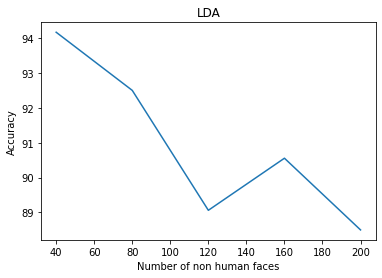

In [ ]:
mixedaccuracyLDA=[]
noOfNonImg=[]
for i in range(40,240,40):
  newMixedImg=mixedImg[0:400+(i*2),:]
  # print(newMixedImg.shape)
  shapeTraining=[]
  Test,Training,yTest,yTraining=Split(newMixedImg,label,2,400+(i*2))
  noOfNonImg.append(len(Test)-200)
  # print(newMixedTraining.shape)
  #LDA
  alpha,w=LDA(Training,newMixedImg,200, i,200+i) #LDA(training,images,stepStart,stepAdd,trainSize)
  index=getIndex(alpha,0.95)
  mixedProjection= w[:,0:index]
  newMixedTest=np.dot(Test,mixedProjection)
  newMixedTrain=np.dot(Training,mixedProjection)
  mixedAcc=KNN(newMixedTrain,newMixedTest,yTraining,yTest,1 , False)
  mixedaccuracyLDA.append(mixedAcc)

#plot LDA
plt.figure()
plt.plot(noOfNonImg,mixedaccuracyLDA)
plt.title("LDA")
plt.ylabel('Accuracy')
plt.xlabel('Number of non human faces')

Text(0.5, 0, 'Number of non human faces')

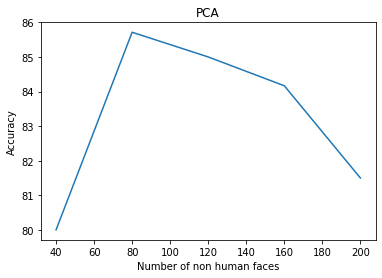

In [ ]:
mixedaccuracyPCA=[]
noOfNonImg=[]
for i in range(40,240,40):
  newMixedImg=mixedImg[0:400+(i*2),:]
  # print(newMixedImg.shape)
  shapeTraining=[]
  Test,Training,yTest,yTraining=Split(newMixedImg,label,2,400+(i*2))
  noOfNonImg.append(len(Test)-200)
  # print(newMixedTraining.shape)
  #PCA
  value,vector=PCA(Training)
  index=getIndex(alpha,0.95)
  projection= vector[:,0:index]
  project.append(projection)
  tests=np.dot(Test,projection)
  trains=np.dot(Training,projection)
  projection=[]
  acc=KNN(tests,trains,yTraining,yTest,1, False)
  mixedaccuracyPCA.append(acc)
#plot PCA
plt.figure()
plt.plot(noOfNonImg,mixedaccuracyPCA)
plt.title("PCA")
plt.ylabel('Accuracy')
plt.xlabel('Number of non human faces')


8. Bonus

8.1 Classification using PCA

For alpha=  0.8 

K=1-->> Accuracy= 96.66666666666667
K=3-->> Accuracy= 92.5
K=5-->> Accuracy= 90.83333333333333
K=7-->> Accuracy= 85.83333333333333
For alpha=  0.85 

K=1-->> Accuracy= 95.83333333333334
K=3-->> Accuracy= 92.5
K=5-->> Accuracy= 90.0
K=7-->> Accuracy= 85.83333333333333
For alpha=  0.9 

K=1-->> Accuracy= 95.83333333333334
K=3-->> Accuracy= 93.33333333333333
K=5-->> Accuracy= 90.0
K=7-->> Accuracy= 85.83333333333333
For alpha=  0.95 

K=1-->> Accuracy= 95.83333333333334
K=3-->> Accuracy= 91.66666666666666
K=5-->> Accuracy= 88.33333333333333
K=7-->> Accuracy= 84.16666666666667
8.2 Classification Using LDA

K=1-->> Accuracy= 97.5
K=3-->> Accuracy= 94.16666666666667
K=5-->> Accuracy= 87.5
K=7-->> Accuracy= 86.66666666666667


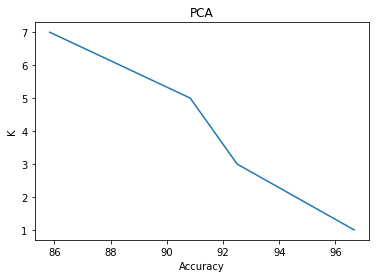

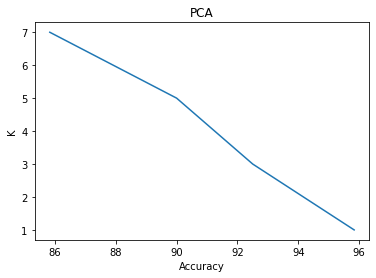

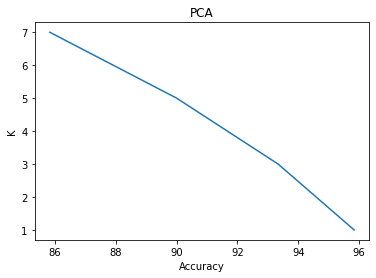

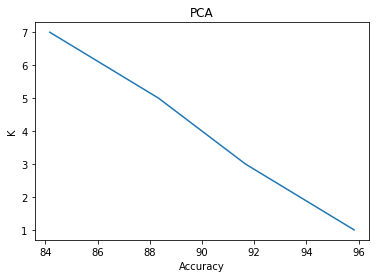

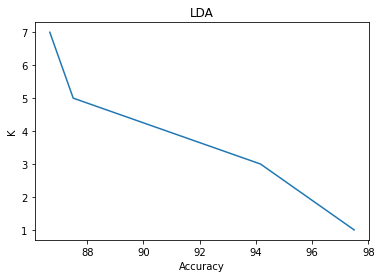

In [ ]:
print("8. Bonus\n")
Test,Training,yTest,yTraining=Split(images,y,7,400)
print("8.1 Classification using PCA\n")
value,vector=PCA(Training)
alpha=[0.8,0.85,0.9,0.95]
index=[0,0,0,0]
for j in range (0,4):
  index[j]=getIndex(value,alpha[j])
  # print(index[j])
project=[]
tests=[]
trains=[]
for r in range (0,4):
  projection= vector[:,0:index[r]]
  project.append(projection)
  temp1=np.dot(Test,projection)
  temp2=np.dot(Training,projection)
  tests.append(temp1)
  trains.append(temp2)
  projection=[]
accuracy=[]
k=[1,3,5,7]
for i in range (0,4):
  print("For alpha= ",alpha[i],"\n")
  for j in range (1,8,2):
    acc=KNN(trains[i],tests[i],yTraining,yTest,j, False)
    print("K="+str(j)+"-->> Accuracy= "+str(acc))
    accuracy.append(acc)
  plt.figure()
  plt.plot(accuracy,k)
  plt.title("PCA")
  plt.xlabel('Accuracy')
  plt.ylabel('K')
  accuracy=[]

print("8.2 Classification Using LDA\n")
value,vector=LDA(Training,images,5,5,200)
projection= vector[:,0:39]
newTest=np.dot(Test,projection)
newTrain=np.dot(Training,projection)
accuracy=[]
k=[1,3,5,7]
for i in range (1,8,2):
  acc=KNN(newTrain,newTest,yTraining,yTest,i,False)
  print("K="+str(i)+"-->> Accuracy= "+str(acc))
  accuracy.append(acc)
plt.figure()
plt.plot(accuracy,k)
plt.title("LDA")
plt.xlabel('Accuracy')
plt.ylabel('K')
shapeTraining=[]